In [1]:
from matplotlib import pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import pandas as pd
import numpy as np


In [2]:
#Introduction

df = pd.read_csv("Logistic.csv")
df

,Restaurant,Extra Cheese,Extra Mushroom,Extra Spicy,Size,Price
0,A,Yes,Yes,No,12,650
1,B,No,Yes,Yes,15,800
2,C,No,No,No,9,500
3,D,Yes,No,Yes,12,700
4,E,Yes,No,Yes,12,750
5,F,No,Yes,Yes,15,900
6,G,Yes,No,No,9,600
7,H,Yes,No,Yes,9,700
8,I,No,Yes,No,15,750
9,J,No,Yes,No,15,700


In [3]:
df.info()
df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Restaurant      20 non-null     object
 1   Extra Cheese    20 non-null     object
 2   Extra Mushroom  20 non-null     object
 3   Extra Spicy     20 non-null     object
 4   Size            20 non-null     int64 
 5   Price           20 non-null     int64 
dtypes: int64(2), object(4)
memory usage: 1.1+ KB


Restaurant        0
Extra Cheese      0
Extra Mushroom    0
Extra Spicy       0
Size              0
Price             0
dtype: int64

In [4]:
df.shape

(20, 6)

Extra Cheese
Yes    12
No      8
Name: count, dtype: int64


<Axes: ylabel='count'>

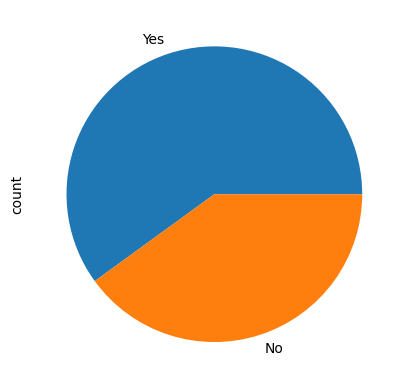

In [5]:
# Data-Visualization

print(df['Extra Cheese'].value_counts())
df['Extra Cheese'].value_counts().plot.pie()

Extra Mushroom
Yes    11
No      9
Name: count, dtype: int64


<Axes: ylabel='count'>

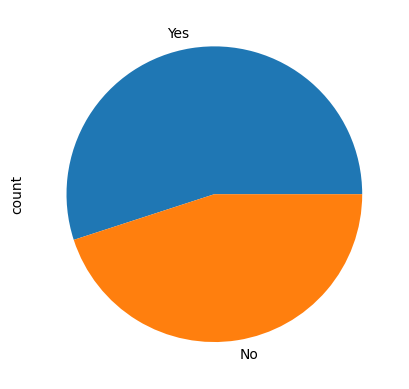

In [6]:
print(df['Extra Mushroom'].value_counts())
df['Extra Mushroom'].value_counts().plot(kind='pie')

Extra Spicy
No     11
Yes     9
Name: count, dtype: int64


<Axes: xlabel='Extra Spicy'>

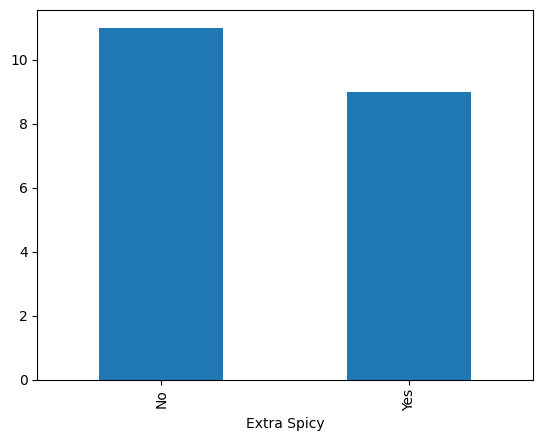

In [7]:
print(df['Extra Spicy'].value_counts())
df['Extra Spicy'].value_counts().plot(kind='bar')

Size
12    8
15    5
9     5
8     2
Name: count, dtype: int64


<Axes: ylabel='Size'>

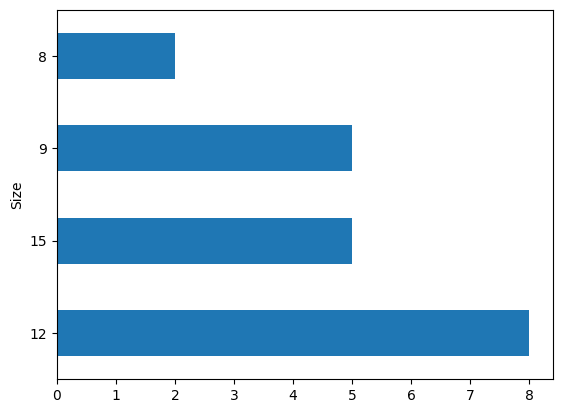

In [8]:
print(df['Size'].value_counts())
df['Size'].value_counts().plot(kind='barh')

Price
700     6
750     3
900     2
650     2
600     2
800     1
500     1
550     1
1000    1
950     1
Name: count, dtype: int64
Total money spent by the customers:  14550


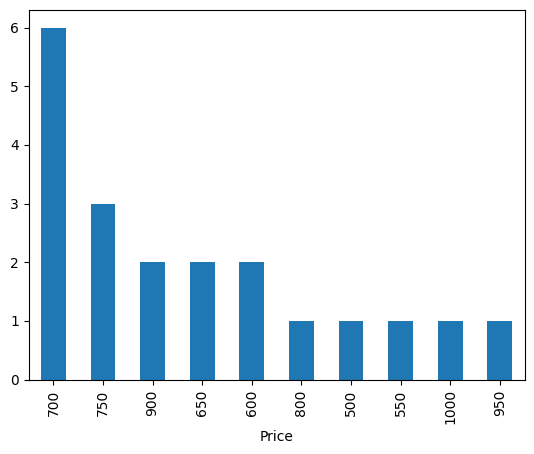

In [9]:
print(df['Price'].value_counts())
df['Price'].value_counts().plot(kind='bar')
print('Total money spent by the customers: ', df['Price'].sum())

Size   8   9   12  15
Price                
500     0   1   0   0
550     1   0   0   0
600     1   1   0   0
650     0   1   1   0
700     0   2   3   1
750     0   0   2   1
800     0   0   0   1
900     0   0   1   1
950     0   0   1   0
1000    0   0   0   1


Size,8,9,12,15
Size,,,,
8,1.000000,0.000000,-0.408248,-0.500000
9,0.000000,1.000000,0.456435,-0.149071
12,-0.408248,0.456435,1.000000,0.408248
15,-0.500000,-0.149071,0.408248,1.000000


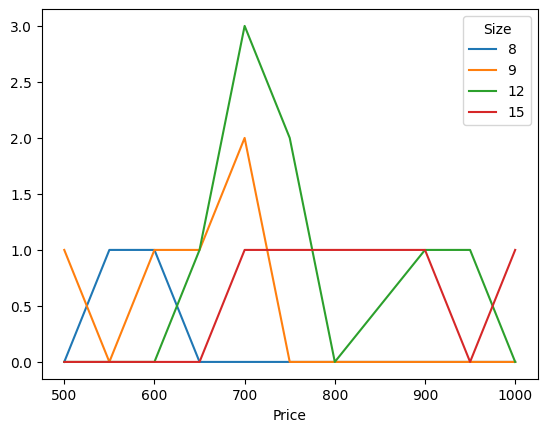

In [10]:
sizeprice = pd.crosstab(index = df['Price'], columns = df['Size'])
print(sizeprice)
sizeprice.plot.line()
corr = sizeprice.corr()
corr.style.background_gradient(cmap='Blues')


Extra Cheese  No  Yes
Price                
500            1    0
550            0    1
600            0    2
650            1    1
700            2    4
750            1    2
800            1    0
900            1    1
950            0    1
1000           1    0


<Axes: xlabel='Price'>

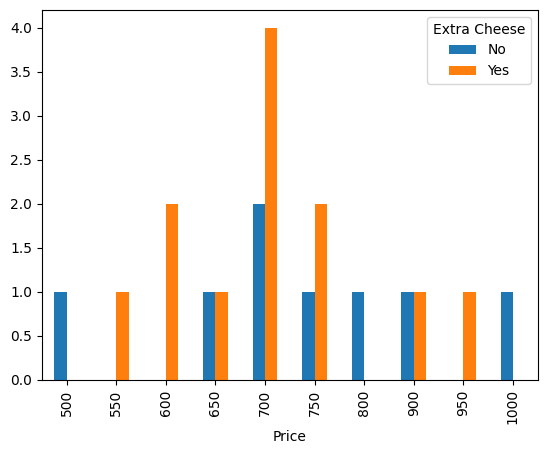

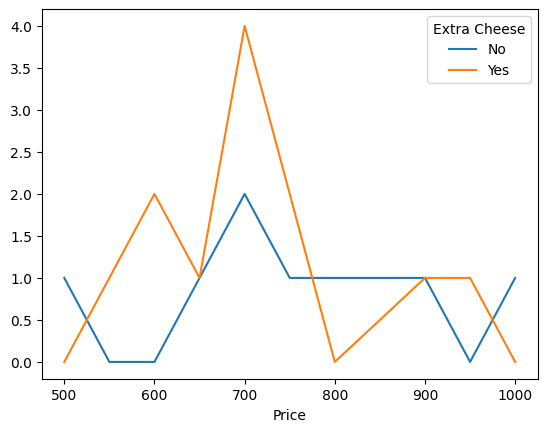

In [11]:
cheeseprice = pd.crosstab(index = df['Price'], columns = df['Extra Cheese'])
print(cheeseprice)
cheeseprice.plot.bar()
cheeseprice.plot.line()

Extra Mushroom  No  Yes
Price                  
500              1    0
550              0    1
600              1    1
650              1    1
700              5    1
750              1    2
800              0    1
900              0    2
950              0    1
1000             0    1


<Axes: xlabel='Price'>

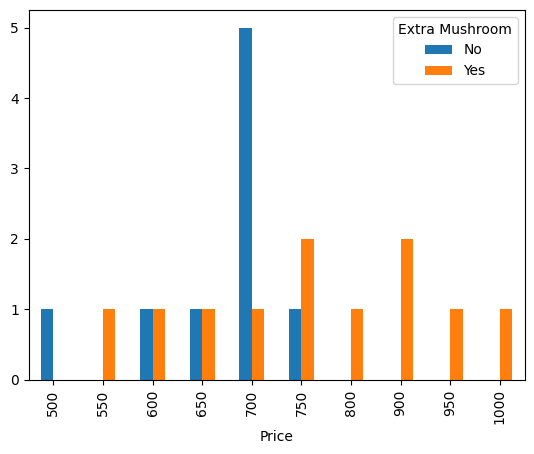

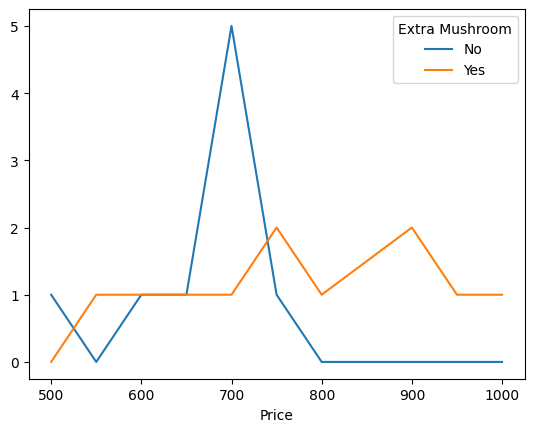

In [12]:
mushprice = pd.crosstab(index = df['Price'], columns = df['Extra Mushroom'])
print(mushprice)
mushprice.plot.bar()
mushprice.plot.line()

Extra Spicy  No  Yes
Price               
500           1    0
550           1    0
600           2    0
650           2    0
700           3    3
750           2    1
800           0    1
900           0    2
950           0    1
1000          0    1


<Axes: xlabel='Price'>

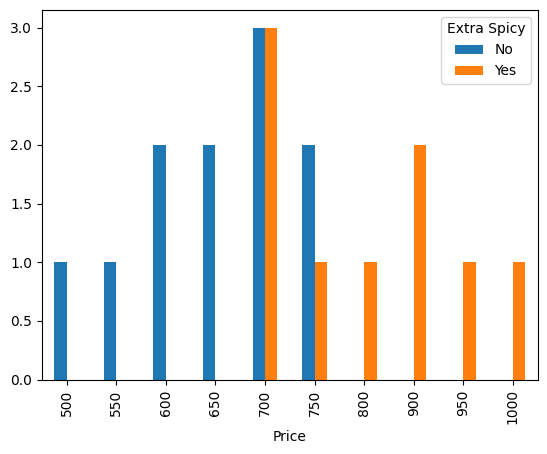

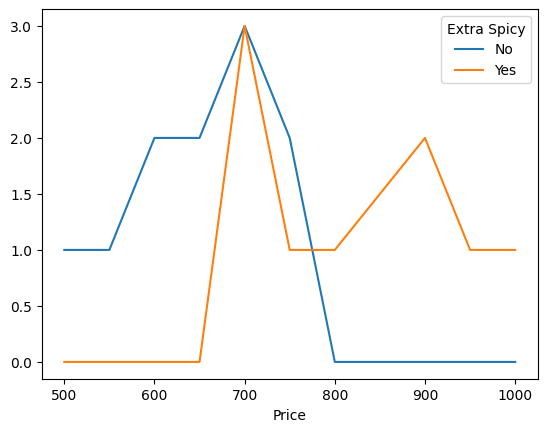

In [13]:
spiceprice = pd.crosstab(index = df['Price'], columns = df['Extra Spicy'])
print(spiceprice)
spiceprice.plot.bar()
spiceprice.plot.line()

In [14]:
#Splitting and testing data

df.replace(('Yes', 'No'), (1, 0),inplace=True)
df

C:\Users\Arshia Shah\AppData\Local\Temp\ipykernel_2180\3577868641.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df.replace(('Yes', 'No'), (1, 0),inplace=True)


,Restaurant,Extra Cheese,Extra Mushroom,Extra Spicy,Size,Price
0,A,1,1,0,12,650
1,B,0,1,1,15,800
2,C,0,0,0,9,500
3,D,1,0,1,12,700
4,E,1,0,1,12,750
5,F,0,1,1,15,900
6,G,1,0,0,9,600
7,H,1,0,1,9,700
8,I,0,1,0,15,750
9,J,0,1,0,15,700


In [15]:
# Prediction and testing data

X = pd.DataFrame(df["Size"])
y = df["Price"]
X_train, X_test, y_train, y_test= train_test_split(X,y,test_size=0.20, random_state=42)
log_reg= LogisticRegression()
regressor= log_reg.fit(X_train, y_train)
size_to_predict = np.array([[20]])

print("Shape of input for prediction:", size_to_predict.shape)

predicted_price = regressor.predict(size_to_predict)[0]
predicted_price


Shape of input for prediction: (1, 1)


C:\Users\Arshia Shah\AppData\Roaming\Python\Python312\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\Arshia Shah\AppData\Roaming\Python\Python312\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


np.int64(1000)